In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
hotelDf = pd.read_csv('dataset.csv', sep=";",index_col=0, low_memory=False, dtype={'hotel_id':object})[['username','hotel_id','overall_rating']]

In [3]:
hotelDf.dtypes

username           object
hotel_id           object
overall_rating    float64
dtype: object

In [4]:
hotelDf.describe()

,overall_rating
count,878526.000000
mean,3.936226
std,1.165074
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [5]:
hotelDf = hotelDf.sample(frac = 0.1, replace = False, random_state=42)

In [6]:

hotelDf.hotel_id=hotelDf.hotel_id.map(lambda x: str(x).replace(';',''))

In [7]:
hotelDf.head()

,username,hotel_id,overall_rating
659101,Debbie039,268533,5.0
709136,landofenchantment,98805,5.0
527089,WaWa2010,109345,4.0
310666,lovebossa,114595,1.0
351825,drohecker,249696,5.0


In [8]:
hotelDf.shape

(87853, 3)

In [9]:
hotelDf.username=hotelDf.username.fillna("missing")

In [10]:
hotelDf.groupby("hotel_id").count()

,username,overall_rating
hotel_id,,
100407,9,9
100504,66,66
100505,75,75
100506,5,5
100507,105,105
...,...,...
99542,3,3
99762,144,144
99766,321,321


In [11]:
xx=hotelDf.groupby("username").count()

In [12]:
# rows 
len(hotelDf.username.unique())

73973

In [13]:
# columns
len(hotelDf.hotel_id.unique())

3457

In [14]:
hotels_ratings=hotelDf[['overall_rating','hotel_id']].groupby('hotel_id').overall_rating.agg(['mean','count'])


In [15]:
hotels_ratings.head()

,mean,count
hotel_id,,
100407,4.666667,9
100504,4.530303,66
100505,4.013333,75
100506,2.200000,5
100507,4.790476,105


In [16]:
hotels_ratings[['mean']].head()

,mean
hotel_id,
100407,4.666667
100504,4.530303
100505,4.013333
100506,2.200000
100507,4.790476


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf0b4130f0>]],
      dtype=object)

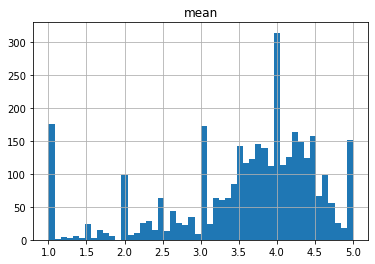

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
hotels_ratings[['mean']].hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf0b4bba58>]],
      dtype=object)

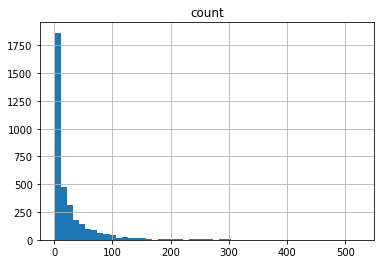

In [18]:
hotels_ratings[['count']].hist(bins=50)

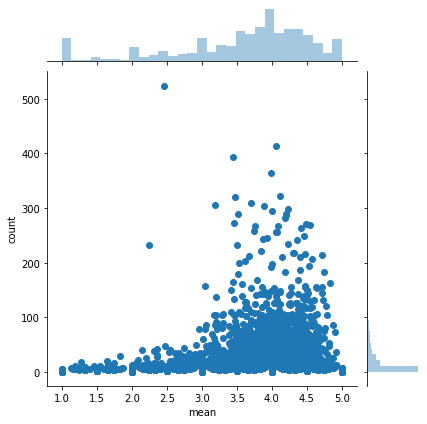

In [19]:
import seaborn as sns
sns.jointplot(x='mean', y='count', data=hotels_ratings)

**we can notice that with the increase of the average ratings, the number of people who rated increased for a majority of hotels**
but in some cases a hotel may have a lot of reviews but a low rating score this depends on the location of the hotel
for example a good hotel in nancy might have 1000 vistors per year and 500 who gave a high score but a bad hotel in paris might have a 20000 visitors be per year of which had  8000 low score. This differes from movies scenarios which are accessible for every person everywhere where the movie which has high rating scores would most certinly have more views...........

**Building a simple item based recommendation system**

In [20]:
#hotels_matrix = hotelDf.pivot_table(index='username', columns='hotel_id', values='overall_rating',)


In [21]:
#hotels_matrix.head()

In [22]:
from scipy.sparse import csr_matrix
from pandas.api.types import CategoricalDtype

persons= CategoricalDtype(hotelDf.username.unique(), ordered=True)
hotels = CategoricalDtype(sorted(hotelDf.hotel_id.unique()), ordered=True)

row = hotelDf.username.astype(persons).cat.codes
col = hotelDf.hotel_id.astype(hotels).cat.codes
sparse_matrix = csr_matrix((hotelDf["overall_rating"], (row, col)), \
                           shape=(persons.categories.size, hotels.categories.size),)

In [23]:
from scipy import sparse

dfs = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, \
                         index=persons.categories, \
                         columns=hotels.categories,)


In [24]:
dfs

,100407,100504,100505,100506,100507,100508,100509,100511,100515,100518,...,99530,99531,99535,99536,99540,99542,99762,99766,99774,99984
Debbie039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
landofenchantment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WaWa2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lovebossa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drohecker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JasonLab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CCRJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gprotomd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lisanti,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
dfs.head()

,100407,100504,100505,100506,100507,100508,100509,100511,100515,100518,...,99530,99531,99535,99536,99540,99542,99762,99766,99774,99984
Debbie039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
landofenchantment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WaWa2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lovebossa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drohecker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
hotels_ratings.sort_values(by="count",ascending=False).head(10)

,mean,count
hotel_id,,
214197,2.461832,524
122005,4.055690,413
93520,3.449239,394
93618,3.994521,365
93562,4.111455,323
99766,3.467290,321
611947,3.708738,309
223023,3.183007,306
93450,3.891089,303


In [27]:
ratings_hotel2=dfs['122005']

In [28]:
ratings_hotel2.head()

Debbie039            0.0
landofenchantment    0.0
WaWa2010             0.0
lovebossa            0.0
drohecker            0.0
Name: 122005, dtype: Sparse[float64, 0.0]

In [ ]:
similar_to_hotel2=dfs.corrwith(ratings_hotel2)

In [ ]:
similar_to_hotel2.sort_values(ascending=False).head(10)

In [ ]:
hotels_ratings.loc['112321']

In [ ]:
hotels_ratings.loc['223683']

In [ ]:
hotels_ratings.loc['99017']

In [ ]:
corr_hotel2 = pd.DataFrame(similar_to_hotel2, columns=['Correlation'])
corr_hotel2.dropna(inplace=True)
corr_hotel2.head()

In [ ]:
corr_hotel2 = corr_hotel2.join(hotels_ratings['mean'])
corr_hotel2 = corr_hotel2.join(hotels_ratings['count'])


In [ ]:
corr_hotel2[corr_hotel2['count'] > 100].sort_values(by='Correlation', ascending=False).head(10)

By the end of the work done -> we are able to get the hotels which are similar.
If a user gave a high score for a hotel, its more probable to also give a high score to the simlar hotels i.e more probable to love these hotels.

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
import sklearn
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=17)

In [ ]:
matrix = SVD.fit_transform(dfs)

In [ ]:
matrix.shape

In [ ]:
corr = np.corrcoef(matrix)
corr.shape